In [1]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG

In [2]:
from keras import layers, Sequential
from keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding1D, ZeroPadding2D, BatchNormalization, Flatten, Conv1D, AveragePooling1D, MaxPooling1D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import metrics
from keras import optimizers
from keras import regularizers
import pydot
from tensorflow.keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflo

In [3]:
#from keras.backend import sigmoid
#def swish(x, beta = 1):
#    return (x * sigmoid(beta * x))

In [4]:
from keras.backend import log
def inv_h_sin(x, theta = 1):
    if x == 0:
        return x
    else:
        return log(theta*x + ((theta*x)**2 + 1)**0.5)/theta

In [5]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

# ------------------------------------------------------------
# needs to be defined as activation class otherwise error
# AttributeError: 'Activation' object has no attribute '__name__'    
class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x):
    return (K.sigmoid(x) * x)

get_custom_objects().update({'swish': Swish(swish)})

In [6]:
#from keras.utils.generic_utils import get_custom_objects
#from keras.layers import Activation
#get_custom_objects().update({'swish': Activation(swish)})
#get_custom_objects().update({'inv_h_sin': Activation(inv_h_sin)})

In [7]:
os.getcwd()

'C:\\Users\\Benedito'

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [10]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [10]:
df = pd.read_csv("modelling_table5.csv")

C:\Anaconda3\envs\benedito_deep\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (623,625,626,629) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data = df

In [12]:
data.head()

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_other,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_other,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_s

In [12]:
data.dtypes.to_csv("modelling_5_dtypes.csv")

In [13]:
categorical_feats = ['MODE(previous.CHANNEL_TYPE)',
'MODE(previous.CODE_REJECT_REASON)',
'MODE(previous.FLAG_LAST_APPL_PER_CONTRACT)',
'MODE(previous.NAME_CASH_LOAN_PURPOSE)',
'MODE(previous.NAME_CLIENT_TYPE)',
'MODE(previous.NAME_CONTRACT_STATUS)',
'MODE(previous.NAME_CONTRACT_TYPE)',
'MODE(previous.NAME_GOODS_CATEGORY)',
'MODE(previous.NAME_PAYMENT_TYPE)',
'MODE(previous.NAME_PORTFOLIO)',
'MODE(previous.NAME_PRODUCT_TYPE)',
'MODE(previous.NAME_SELLER_INDUSTRY)',
'MODE(previous.NAME_TYPE_SUITE)',
'MODE(previous.NAME_YIELD_GROUP)',
'MODE(previous.PRODUCT_COMBINATION)',
'MODE(previous.WEEKDAY_APPR_PROCESS_START)',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[0]',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[1]',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[2]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[0]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[1]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[2]',
'N_MOST_COMMON(previous.FLAG_LAST_APPL_PER_CONTRACT)[0]',
'N_MOST_COMMON(previous.FLAG_LAST_APPL_PER_CONTRACT)[1]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[0]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[1]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[2]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[0]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[1]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[2]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[0]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[1]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[2]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[0]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[1]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[2]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[0]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[1]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[2]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[0]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[1]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[2]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[0]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[1]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[2]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[0]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[1]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[2]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[0]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[1]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[2]',
'MODE(bureau.CREDIT_ACTIVE)',
'MODE(bureau.CREDIT_CURRENCY)',
'MODE(bureau.CREDIT_TYPE)',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[0]',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[1]',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[2]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[0]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[1]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[2]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[0]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[1]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[2]']

In [14]:
data.head()

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_other,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_other,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_s

In [15]:
data[categorical_feats].fillna("no_info", inplace = True)

C:\Anaconda3\envs\benedito_deep\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
data.head()

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_other,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_other,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_s

In [17]:
def check_string(x):
    if x in ('NaN', 'NA', 'n/a', 'N/A', 'inf', '-inf', 'Inf', '-Inf'):
        return True
    else:
        return False

In [18]:
def fill_cat(df, lista_cat):
    for cat_feat in lista_cat:
        df.loc[pd.isna(df[cat_feat]), cat_feat] = 'no_info'
        df.loc[df[cat_feat].isnull(), cat_feat] = 'no_info'
        df.loc[df[cat_feat].apply(check_string), cat_feat] = 'no_info'
    return df
    

In [19]:
data = fill_cat(data, categorical_feats)

In [20]:
data.fillna(0, inplace = True)

In [21]:
data.head()

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_other,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_other,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_s

In [22]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [23]:
data = data.drop(categorical_feats, axis = 1)

In [24]:
data.set_index('SK_ID_CURR', inplace=True)

In [25]:
data = data.replace([np.inf, -np.inf], 0)

In [26]:
data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_other,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_other,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,cnt_appl_previous,cnt_revolving_previous,cnt_cash_previous,cnt_consumer_previous,avg_amt_annuity_previous,avg_amt_application_previous,avg_amt_credit_previous,avg_amt_down_payment_previous,avg_amt_goods_price_previous,cnt_appl_start_bus_day_previous,cnt_appl_start_weekend_previous,cnt_appl_start_dawn_previous,cnt

In [ ]:
#data = pd.get_dummies(data, columns = categorical_feats, drop_first = True)

In [27]:
feat_selected = ["mean_knn_target",
"EXT_SOURCE_3",
"EXT_SOURCE_2",
"EXT_SOURCE_1",
"SUM(previous.CNT_PAYMENT)",
"amt_credit_sum_consumer_credit_bureau",
"avg_pos_cash_cnt_installment_future_previous",
"CODE_GENDER_M",
"amt_credit_sum_debt_credit_card_bureau",
"cnt_refused_previous",
"NAME_CONTRACT_TYPE_Revolving loans",
"max_pos_cash_sk_dpd_def_previous",
"SUM(previous.DAYS_FIRST_DRAWING)",
"amt_paid_down",
"NAME_EDUCATION_TYPE_Higher education",
"STD(previous.DAYS_FIRST_DRAWING)",
"NAME_FAMILY_STATUS_Married",
"MIN(previous.CNT_PAYMENT)",
"cnt_yield_low_normal_previous",
"avg_amt_application_previous",
"credit_income_ratio",
"remaining_pmts",
"OCCUPATION_TYPE_Sales staff",
"MAX(previous.NFLAG_LAST_APPL_IN_DAY)",
"FLAG_EMAIL",
"missing_rate",
"REGION_RATING_CLIENT_W_CITY_2",
"COUNT(bureau)",
"gap_avg_application_credit_previous",
"days_phone_change_over_gap_amt_installment",
"FLAG_OWN_CAR_Y",
"avg_pos_cash_cnt_installment_previous",
"NAME_EDUCATION_TYPE_Secondary / secondary special",
"YEARS_BUILD_MODE",
"UI_credit_card_bureau",
"ENTRANCES_AVG",
"num_loans_l1m",
"STD(bureau.CREDIT_DAY_OVERDUE)",
"STD(previous.AMT_GOODS_PRICE)",
"max_interest_rate_privileged_previous",
"cnt_contracts_bureau",
"SKEW(previous.DAYS_TERMINATION)",
"MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)",
"MIN(previous.AMT_APPLICATION)",
"MIN(bureau.DAYS_CREDIT)",
"delinquency_6_mths_consumer_credit_bureau",
"MAX(previous.DAYS_FIRST_DRAWING)",
"NAME_EDUCATION_TYPE_Lower secondary",
"MIN(previous.HOUR_APPR_PROCESS_START)",
"avg_amt_credit_card_receivable_principal_previous",
"MEAN(bureau.AMT_CREDIT_SUM)",
"amt_credit_max_overdue_bureau",
"DAYS_ID_PUBLISH",
"tot_debt_lim_ratio",
"avg_amt_credit_card_total_receivable_previous",
"max_interest_rate_primary_previous",
"MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL)",
"num_loans_l6m",
"STD(bureau.DAYS_CREDIT)",
"MEAN(previous.RATE_INTEREST_PRIMARY)",
"FLOORSMIN_AVG",
"SUM(bureau.AMT_CREDIT_SUM_DEBT)",
"avg_cnt_credit_card_drawings_atm_previous",
"APARTMENTS_MEDI",
"LIVINGAREA_MODE",
"delinquency_12_24_mths_microloan_bureau",
"SKEW(bureau.DAYS_CREDIT)",
"LANDAREA_AVG",
"num_loans_l3m",
"FLAG_DOCUMENT_13",
"MAX(bureau.AMT_CREDIT_SUM_DEBT)",
"MAX(previous.CNT_PAYMENT)",
"delinquency_6_12_mths_credit_card_bureau",
"MAX(bureau.AMT_CREDIT_SUM_LIMIT)",
"MEAN(previous.AMT_CREDIT)",
"MAX(bureau.DAYS_CREDIT_UPDATE)",
"WALLSMATERIAL_MODE_Monolithic",
"avg_amt_credit_card_drawings_atm_previous",
"MEDIAN(previous.CNT_PAYMENT)",
"avg_cnt_credit_card_instalment_mature_cum_previous",
"FLAG_PHONE",
"YEARS_BEGINEXPLUATATION_AVG",
"SUM(previous.DAYS_TERMINATION)",
"income_over_credit",
"days_phone_change_times_gap_days_installment",
"SUM(previous.AMT_GOODS_PRICE)",
"LANDAREA_MEDI",
"max_cnt_payment_previous",
"SUM(bureau.AMT_CREDIT_SUM_OVERDUE)",
"MEAN(previous.NFLAG_LAST_APPL_IN_DAY)",
"MIN(previous.RATE_DOWN_PAYMENT)",
"SKEW(bureau.AMT_CREDIT_SUM_LIMIT)",
"SUM(previous.RATE_DOWN_PAYMENT)",
"cnt_portfolio_cash_previous",
"MEDIAN(bureau.CNT_CREDIT_PROLONG)",
"SKEW(previous.DAYS_DECISION)",
"NAME_INCOME_TYPE_State servant",
"STD(previous.AMT_CREDIT)",
"MEAN(bureau.DAYS_ENDDATE_FACT)",
"NAME_TYPE_SUITE_Other_A",
"FLOORSMIN_MEDI",
"DEF_30_CNT_SOCIAL_CIRCLE",
"REG_REGION_NOT_WORK_REGION",
"SKEW(bureau.AMT_CREDIT_MAX_OVERDUE)",
"NONLIVINGAREA_MEDI",
"delinquency_6_12_mths_microloan_bureau",
"avg_amt_credit_card_recivable_previous",
"delinquency_long_total_bureau",
"FLAG_WORK_PHONE",
"cnt_channel_contact_center_previous",
"SUM(previous.DAYS_FIRST_DUE)",
"OWN_CAR_AGE",
"AMT_GOODS_PRICE",
"cnt_appl_previous",
"delinquency_12_24_mths_consumer_credit_bureau",
"cnt_cash_previous",
"NAME_TYPE_SUITE_Family",
"MEAN(previous.AMT_DOWN_PAYMENT)",
"FLAG_DOCUMENT_3",
"NAME_TYPE_SUITE_Group of people",
"cnt_seller_furniture_previous",
"delinquency_6_12_mths_total_bureau",
"CODE_GENDER_XNA",
"amt_credit_sum_working_capital_bureau",
"MEDIAN(previous.RATE_DOWN_PAYMENT)",
"DAYS_REGISTRATION",
"DEF_60_CNT_SOCIAL_CIRCLE",
"SUM(bureau.DAYS_CREDIT_ENDDATE)",
"MIN(bureau.DAYS_CREDIT_ENDDATE)",
"delinquency_24_36_mths_consumer_credit_bureau",
"MAX(previous.AMT_DOWN_PAYMENT)",
"UI_credit_sum_total_bureau",
"SKEW(bureau.DAYS_ENDDATE_FACT)",
"SKEW(previous.AMT_DOWN_PAYMENT)",
"NAME_INCOME_TYPE_Student",
"MEDIAN(bureau.DAYS_CREDIT_UPDATE)",
"credit_income_cluster_4",
"YEARS_BEGINEXPLUATATION_MEDI",
"NAME_HOUSING_TYPE_Office apartment",
"max_credit_card_sk_dpd_def_previous",
"SKEW(previous.AMT_APPLICATION)",
"cnt_product_xsell_previous",
"WALLSMATERIAL_MODE_Stone, brick",
"cnt_yield_low_action_previous",
"MAX(previous.DAYS_DECISION)",
"amt_credit_sum_overdue_microloan_bureau",
"MEAN(previous.DAYS_TERMINATION)",
"OBS_30_CNT_SOCIAL_CIRCLE",
"cnt_seller_electronics_previous",
"MAX(previous.HOUR_APPR_PROCESS_START)",
"WALLSMATERIAL_MODE_Panel",
"MEDIAN(previous.AMT_APPLICATION)",
"down_payment_times_cnt_refused_previous",
"MEDIAN(previous.AMT_CREDIT)",
"max_installments_gap_amt_payment_previous",
"STD(previous.CNT_PAYMENT)",
"FLOORSMIN_MODE",
"FLOORSMAX_AVG",
"STD(bureau.DAYS_ENDDATE_FACT)"]

In [28]:
data = data.loc[:,['TARGET']+feat_selected]
data.reset_index(inplace = False).to_csv("modelling_table_7.csv")

In [29]:
data.head()

,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous,SKEW(previous.AMT_APP

In [30]:
np.random.seed(11235)
sample = data.sample(200000, random_state = 11235)

In [31]:
valid = data[~data.index.isin(sample.index)].sample(100000, random_state = 11235)
test_final = data[~((data.index.isin(valid.index))|data.index.isin(sample.index))]

In [32]:
X = sample.drop(['TARGET'], axis =1)
y = sample['TARGET']

In [33]:
X = X[feat_selected]

In [34]:
X.fillna(0, inplace = True)

In [ ]:
#smote = SMOTE(sampling_strategy = 0.1, random_state = 11235) ##0.15 fica bom

In [ ]:
#X_, y_ = X, y

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=1234)

In [ ]:
#from keras.callbacks import EarlyStopping

In [ ]:
#callback = EarlyStopping(monitor='AUC', patience=5)

## Neural Network

In [35]:
### MELHOR DE TODAS
NN_Model = Sequential()
NN_Model.add(Dense(32, input_dim=X.shape[-1], activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(256, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(32, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5, seed = 11235))
NN_Model.add(Dense(1, activation='sigmoid', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))

In [36]:
metrics_ = [metrics.FalseNegatives(name="fn"),metrics.FalsePositives(name="fp"),
           metrics.TrueNegatives(name="tn"),
           metrics.TruePositives(name="tp"),
           metrics.Precision(name="precision"),
           metrics.Recall(name="recall"),
           metrics.AUC(name="AUC"), 
           metrics.Accuracy(name="accuracy")]

In [ ]:
#opt = optimizers.Nadam()

In [37]:
#NN_Model.compile(loss='binary_crossentropy', optimizer="adam", metrics=metrics_)
NN_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics_)

#tf.keras.metrics.Precision(), tf.keras.metrics.Recall() tf.keras.metrics.AUC()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
class_weight = {0: 1/(y==0).sum(), 1: 1/(y==1).sum()}

In [39]:
scaler = StandardScaler()

In [40]:
feats = X.columns
X = scaler.fit_transform(X)

X_valid = scaler.transform(valid[feats])
y_valid = valid['TARGET']
X_test_final = scaler.transform(test_final[feats])
y_test_final = test_final['TARGET']

In [41]:
#NN_Model.fit(x = X, y = y, epochs = 128, batch_size = 2048, class_weight = class_weight)#, callbacks = [callback])
NN_Model.fit(x = X, y = y, epochs = 17, batch_size = 64, class_weight = class_weight, validation_data = (X_valid, y_valid))#, callbacks = [callback])


Train on 200000 samples, validate on 100000 samples
Epoch 1/17
200000/200000 [==============================] - 53s 266us/step - loss: 6.2789e-06 - fn: 5475.0000 - fp: 66266.0000 - tn: 117576.0000 - tp: 10683.0000 - precision: 0.1388 - recall: 0.6612 - AUC: 0.7104 - accuracy: 0.0000e+00 - val_loss: 0.5749 - val_fn: 2625.0000 - val_fp: 25058.0000 - val_tn: 66877.0000 - val_tp: 5440.0000 - val_precision: 0.1784 - val_recall: 0.6745 - val_AUC: 0.7614 - val_accuracy: 2.0000e-05
Epoch 2/17
200000/200000 [==============================] - 43s 215us/step - loss: 5.8176e-06 - fn: 4934.0000 - fp: 52598.0000 - tn: 131244.0000 - tp: 11224.0000 - precision: 0.1759 - recall: 0.6946 - AUC: 0.7665 - accuracy: 5.0000e-06 - val_loss: 0.5872 - val_fn: 2501.0000 - val_fp: 25729.0000 - val_tn: 66206.0000 - val_tp: 5564.0000 - val_precision: 0.1778 - val_recall: 0.6899 - val_AUC: 0.7663 - val_accuracy: 0.0000e+00
Epoch 3/17
200000/200000 [==============================] - 42s 208us/step - loss: 5.7676e-06

In [43]:
predictions = NN_Model.predict(X_valid)
predictions_ = (predictions > 0.5).astype(int)

In [42]:
acc_valid = metrics_sk.accuracy_score(y_valid, (NN_Model.predict(X_valid)>0.5))
f1_valid = metrics_sk.f1_score(y_valid, (NN_Model.predict(X_valid)>0.5))
precision_valid = metrics_sk.precision_score(y_valid, (NN_Model.predict(X_valid)>0.5))
recall_valid = metrics_sk.recall_score(y_valid, (NN_Model.predict(X_valid)>0.5))
auc_valid = metrics_sk.roc_auc_score(y_valid, NN_Model.predict(X_valid))

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.70459
precision_valid:  0.17375961393454983
recall_valid:  0.7170489770613763
F1_valid:  0.28016852974842305
AUC_valid:  0.7747142181204266


## LightGBM

In [ ]:
#dtree = LGBMClassifier(max_depth = 2, min_samples_split=100, min_data_in_leaf = 250,n_estimators=300,
#                            min_impurity_decrease=1e-03, lambda_l1=0.3,
#                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [47]:
###GRID SEARCH LGBM ---> NAO RODAR SEMPRE

list_i = [2, 4, 6]
list_j = [50, 100, 150]
list_k = [200, 300, 400]
list_l = [100, 200, 300]

for i in list_i:
    for j in list_j:
        for k in list_k:
            for l in list_l:
                dtree = LGBMClassifier(max_depth = i, min_samples_split=j, min_data_in_leaf = k,n_estimators=l,
                            min_impurity_decrease=1e-03, lambda_l1=0.3, lambda_l2=0.7, random_state=11235, eta = 0.005)
                class_tree = dtree.fit(X, y)
                auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])
                print('depth: ', i, 'samples_split: ', j, 'data_in_leaf: ', k, 'n_estimators: ', l, 'auc_valid: ', auc_valid)

depth:  2 samples_split:  50 data_in_leaf:  200 n_estimators:  100 auc_valid:  0.7753787142597952
depth:  2 samples_split:  50 data_in_leaf:  200 n_estimators:  200 auc_valid:  0.7803160168251437
depth:  2 samples_split:  50 data_in_leaf:  200 n_estimators:  300 auc_valid:  0.7825814938186975
depth:  2 samples_split:  50 data_in_leaf:  300 n_estimators:  100 auc_valid:  0.7754486489770748
depth:  2 samples_split:  50 data_in_leaf:  300 n_estimators:  200 auc_valid:  0.7802208216666733
depth:  2 samples_split:  50 data_in_leaf:  300 n_estimators:  300 auc_valid:  0.7827228468211742
depth:  2 samples_split:  50 data_in_leaf:  400 n_estimators:  100 auc_valid:  0.7754217869568822
depth:  2 samples_split:  50 data_in_leaf:  400 n_estimators:  200 auc_valid:  0.7802569074332181
depth:  2 samples_split:  50 data_in_leaf:  400 n_estimators:  300 auc_valid:  0.782573606632169
depth:  2 samples_split:  100 data_in_leaf:  200 n_estimators:  100 auc_valid:  0.7753787142597952
depth:  2 samples_sp

In [43]:
dtree = LGBMClassifier(max_depth = 4, min_samples_split=50, min_data_in_leaf = 300,n_estimators=300,
                            min_impurity_decrease=1e-03, lambda_l1=0.3,
                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [44]:
class_tree = dtree.fit(X, y)

In [45]:
acc_valid = metrics_sk.accuracy_score(y_valid, class_tree.predict(X_valid))
f1_valid = metrics_sk.f1_score(y_valid, class_tree.predict(X_valid))
precision_valid = metrics_sk.precision_score(y_valid, class_tree.predict(X_valid))
recall_valid = metrics_sk.recall_score(y_valid, class_tree.predict(X_valid))
auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.92024
precision_valid:  0.5779334500875657
recall_valid:  0.04091754494730316
F1_valid:  0.07642427049559981
AUC_valid:  0.7865572494866602


## Stacking NN+LGBM

In [46]:
pred_nn = NN_Model.predict(X_valid)
pred_lgbm = class_tree.predict_proba(X_valid)[:,1].reshape(-1, 1)


In [47]:
X_stack = np.zeros((pred_nn.shape[0], 2))

In [48]:
X_stack[:,0] = pred_nn.reshape(1, -1)
X_stack[:,1] = pred_lgbm.reshape(1, -1)
#X_stack[:,2] = pred_nn.reshape(1, -1)**2
#X_stack[:,3] = pred_lgbm.reshape(1, -1)**2
#X_stack[:,4] = pred_nn.reshape(1, -1)**3
#X_stack[:,5] = pred_lgbm.reshape(1, -1)**3

In [49]:
class_weight = {0: 1/(y_valid==0).sum(), 1: 1/(y_valid==1).sum()}

In [50]:
lr = LogisticRegression()#class_weight=class_weight

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb = GaussianNB(var_smoothing = 0.01)

In [53]:
lr_ = lr.fit(X_stack, y_valid)

In [54]:
nb_ = nb.fit(X_stack, y_valid)

## Validação - supervisor logistico

In [55]:
acc_stack = metrics_sk.accuracy_score(y_valid, lr_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, lr_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, lr_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, lr_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, lr_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.92016
precision_stack:  0.5481569560047562
recall_stack:  0.057160570365778055
F1_stack:  0.10352571300247025
AUC_stack:  0.7830477198724362


## Validação - supervisor Naive Bayes

In [56]:
acc_stack = metrics_sk.accuracy_score(y_valid, nb_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, nb_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, nb_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, nb_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, nb_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.89434
precision_stack:  0.33080773914219996
recall_stack:  0.3031618102913825
F1_stack:  0.31638198757763975
AUC_stack:  0.7823759684116022


In [57]:
pred_nn_final = NN_Model.predict(X_test_final)
pred_lgbm_final = class_tree.predict_proba(X_test_final)[:,1].reshape(-1, 1)

In [58]:
X_stack_final = np.zeros((pred_nn_final.shape[0], 2))

In [59]:
X_stack_final[:,0] = pred_nn_final.reshape(1, -1)
X_stack_final[:,1] = pred_lgbm_final.reshape(1, -1)
#X_stack_final[:,2] = pred_nn_final.reshape(1, -1)**2
#X_stack_final[:,3] = pred_lgbm_final.reshape(1, -1)**2
#X_stack_final[:,4] = pred_nn_final.reshape(1, -1)**3
#X_stack_final[:,5] = pred_lgbm_final.reshape(1, -1)**3

## Teste final - supervisor Naive Bayes

In [60]:
acc_stack = metrics_sk.accuracy_score(y_test_final, nb_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, nb_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, nb_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, nb_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, nb_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.8897616828651311
precision_stack:  0.3038194444444444
recall_stack:  0.29069767441860467
F1_stack:  0.29711375212224106
AUC_stack:  0.7837247290235809


## Teste final - supervisor logístico

In [61]:
acc_stack = metrics_sk.accuracy_score(y_test_final, lr_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, lr_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, lr_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, lr_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, lr_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.919185195047264
precision_stack:  0.463768115942029
recall_stack:  0.053156146179401995
F1_stack:  0.09538002980625933
AUC_stack:  0.7843575402876213


# Optimizing F1 Score

In [62]:
#### optimizing f1 score
X_opt = np.zeros((X_stack.shape[0], 4))

In [63]:
X_opt[:,0] = 1
X_opt[:,1:3]=X_stack
X_opt[:,3] = y_valid

In [ ]:
#def sigmoid(x): resulta em overflow essa merda
#    return 1/(1+np.exp(-x))

In [64]:
def sigmoid(x): ##corrigido
    if x.all()>=0:
        z = np.exp(-x)
        return 1/(1+z)
    else:
        z = np.exp(-x)
        return z/(1+z)

In [65]:
def sigmoid1(x): ##derivada
    return sigmoid(x)*(1-sigmoid(x))

In [66]:
alpha = 0.25 ##obtive via grid search 
gamma = 2

In [67]:
def f(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    F = A/(alpha*npos +(1-alpha)*mpos)
    return -F

In [68]:
def logf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    logF = np.log(A) - np.log((alpha*npos +(1-alpha)*mpos))
    return -logF.round(3)

In [69]:
def df(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    h = 1/(alpha*npos + (1-alpha)*mpos)
    dF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dF[j] = h*dA[j]-(h**2)*A*(1-alpha)*dmpos[j]
    return -dF
        
    

In [70]:
def dlogf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    dlogF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dlogF[j] = (1/A)*dA[j] - (1/(alpha*npos + (1-alpha)*mpos))*(1-alpha)*dmpos[j]
    return -dlogF.round(3)

In [71]:
from scipy import optimize

In [72]:
def predict_opt(X, theta_opt):
    score = sigmoid(np.dot(X[:,:-1], theta_opt))
    predict = (score>0.5).astype(int)
    return (score, predict)

In [78]:
##GRID SEARCH + RANDOM INITIALIZATION --> nao rodar sempre
np.random.seed(42)
#theta_matrix = np.random.normal(loc=0.0, scale=20.0, size=(150, 3)).round(3)
theta_matrix = np.random.randint(low=-30, high=30, size=(200, 3))

list_alpha = [0.25, 0.5, 0.75] 
list_gamma = [2, 4, 8]

lista_alpha = []
lista_gamma = []
lista_theta = []
lista_theta_opt = []
lista_auc = []
lista_precision = []
lista_recall = []
lista_f1 = []

for i in range(len(list_alpha)):
    for j in range(len(list_gamma)):
        for k in range(theta_matrix.shape[0]):
            
            alpha = list_alpha[i]
            gamma = list_gamma[j]
            theta = theta_matrix[k,:].T
            theta_opt = optimize.minimize(logf, theta, jac = dlogf, method = 'bfgs').x
            #theta_opt,k = bfgs_method(f, df, theta, maxiter = None, epsi = 0.0001)
            score, predicted = predict_opt(X_opt, theta_opt)
            print('alpha = ', alpha, 'gamma = ', gamma, 'theta_init = ', theta,
                  'theta_opt = ', theta_opt,
                  'AUC = ', metrics_sk.roc_auc_score(y_valid, score),
                  'precision = ', metrics_sk.precision_score(y_valid, predicted),
                  'recall = ', metrics_sk.recall_score(y_valid, predicted),
                  'F1 = ', metrics_sk.f1_score(y_valid, predicted))
            lista_alpha.append(alpha)
            lista_gamma.append(gamma)
            lista_theta.append(theta)
            lista_theta_opt.append(theta_opt)
            lista_auc.append(metrics_sk.roc_auc_score(y_valid, score))
            lista_precision.append(metrics_sk.precision_score(y_valid, predicted))
            lista_recall.append(metrics_sk.recall_score(y_valid, predicted))
            lista_f1.append(metrics_sk.f1_score(y_valid, predicted))

alpha =  0.25 gamma =  2 theta_init =  [ 8 21 -2] theta_opt =  [ 8. 21. -2.] AUC =  0.7731567678463358 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-16  12 -23] theta_opt =  [-138.26352195  149.51005908  120.28384954] AUC =  0.7815166299028422 precision =  0.31110572259941804 recall =  0.31816491010539366 F1 =  0.3145957212039478
alpha =  0.25 gamma =  2 theta_init =  [-10   8  27] theta_opt =  [-11.7297439    6.81500311  26.72792285] AUC =  0.7867039392875455 precision =  0.3455406471981058 recall =  0.27141971481711097 F1 =  0.3040277777777778
alpha =  0.25 gamma =  2 theta_init =  [-12  -8 -20] theta_opt =  [ 18.84674996  -3.22159235 -19.21237833] AUC =  0.21262216077553647 precision =  0.08064080640806408 recall =  0.9998760074395536 F1 =  0.14924489191590168
alpha =  0.25 gamma =  2 theta_init =  [-20  -7  22] theta_opt =  [-9.52612287  2.75067982 30.23712234] AUC =  0.7877381196471225 precision =  0.34570468725004 recall =  

In [79]:
results = pd.DataFrame()
results['alpha']=lista_alpha
results['gamma']=lista_gamma
results['theta']=lista_theta
results['theta_opt']=lista_theta_opt
results['AUC']=lista_auc
results['Precision'] = lista_precision
results['Recall'] = lista_recall
results['F1'] = lista_f1
results.to_csv("resultados_otimizacao_log_table_5_final.csv")

In [ ]:
#alpha =  0.25 gamma =  2 theta_init =  [-1 -4  9] theta_opt =  [-568.50174834  322.85256065 2247.08499949] AUC =  0.7829109328873998 precision =  0.2642267969778887 recall =  0.4726596404215747 F1 =  0.338964965321003
#alpha =  0.25 gamma =  2 theta_init =  [0 3 5] theta_opt =  [-431.15928105  220.73593698 1731.39766752] AUC =  0.7840137316349044 precision =  0.26989136817381093 recall =  0.45592064476131433 F1 =  0.3390658859329614
#0.1	2	[-12.902   7.228  30.761]	[-12.902   7.228  30.761]	0.7882440904853698	0.34440142942227514	0.28679479231246124	0,312969353
#0.1	2	[-21.154  16.451 -24.417]	[-89.98832355  91.3083205   81.7098475 ]	0.7784056931783964	0.3293559516963772	0.28406695598264103	0,305039611
#0.25	2	[ -5.051 -24.956  32.648]	[-11.94642079   0.16685741  50.35630243]	0.7865348206371445	0.33280689160086147	0.2874147551146931	0,308449767
#0.25	2	[-18.16  -28.246  29.313]	[-18.25223462   5.61979402  59.03788049]	0.7871950151039016	0.3361270401411557	0.28344699318040917	0,307547424

#0.25	2	[ -0.717  31.293 -52.395]	[-1968.81416686  2356.06814755  1390.76945771]	0.7442478049348258	0.2828002298410266	0.3661500309981401	0,319122494

#	0.25	2	[ -9.685  25.338 -14.153]	[-233.99079602  188.47355835  372.24989718]	0.7836955872384971	0.33852496564360973	0.2748915065096094	0,303407691

#0.25	2	[-19   8 -29]	[-155.83910967  190.17488829   98.17151583]	0.7791330501134744	0.2813565744600227	0.36825790452572843	0,318994683
#0.25	2	[-20  -7  22]	[-8.48470663  1.43889145 30.69991719]	0.7872147735311658	0.3399938987187309	0.2763794172349659	0,304903905
#0.25	2	[-22  -5  22]	[-10.98538955   5.16173794  30.62632766]	0.786705006107748	0.33062937062937064	0.2931184128952263	0,310745974

#0.25	2	[-19   8 -29]	[-86.1936745  107.01634131  37.34814329]	0.7788277466717419	0.2922597402597403	0.34879107253564784	0,318032787


In [73]:
alpha = 0.25
gamma = 2
theta_opt = np.array([-86.1936745,  107.01634131,  37.34814329])

In [74]:
score, predicted = predict_opt(X_opt, theta_opt)

### Performance em validação (usado para otimizar)

In [75]:
print('AUC:', metrics_sk.roc_auc_score(y_valid, score))
print('PRECISION: ', metrics_sk.precision_score(y_valid, predicted))
print('RECALL: ', metrics_sk.recall_score(y_valid, predicted))
print('F1: ', metrics_sk.f1_score(y_valid, predicted))

AUC: 0.7783195821760239
PRECISION:  0.2900779007790078
RECALL:  0.3508989460632362
F1:  0.3176028281241232


In [76]:
X_opt_final = np.zeros((X_stack_final.shape[0], 4))
X_opt_final[:,0] = 1
X_opt_final[:,1:3]=X_stack_final
X_opt_final[:,3] = y_test_final

In [77]:
score_final, predicted_final = predict_opt(X_opt_final, theta_opt)

In [78]:
X_opt_final.shape

(7511, 4)

In [79]:
X_stack_final.shape

(7511, 2)

### Performance no teste final

In [80]:
print('ACCURACY', metrics_sk.accuracy_score(y_test_final, predicted_final))
print('AUC', metrics_sk.roc_auc_score(y_test_final, score_final))
print('PRECISION', metrics_sk.precision_score(y_test_final, predicted_final))
print('RECALL', metrics_sk.recall_score(y_test_final, predicted_final))
print('F1', metrics_sk.f1_score(y_test_final, predicted_final))

ACCURACY 0.8764478764478765
AUC 0.781159102504365
PRECISION 0.28091397849462363
RECALL 0.34717607973421927
F1 0.31054977711738485


In [88]:
from eli5.permutation_importance import get_score_importances

C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [90]:
def score(X, y):
    y_pred = NN_Model.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [91]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.09357881697953796, 'avg_pos_cash_cnt_installment_future_previous': 0.011638870576151605, 'SUM(previous.CNT_PAYMENT)': 0.007169953582620581, 'EXT_SOURCE_2': 0.0030536509507316234, 'CODE_GENDER_M': 0.0029822192537155125, 'COUNT(bureau)': 0.0023152909994138327, 'income_over_credit': 0.0022364059782391753, 'EXT_SOURCE_1': 0.002200413635447829, 'amt_paid_down': 0.002005232714418881, 'max_pos_cash_sk_dpd_def_previous': 0.001530504051482784, 'MIN(bureau.DAYS_CREDIT_ENDDATE)': 0.0014437329324887838, 'remaining_pmts': 0.0011503123904542001, 'avg_cnt_credit_card_drawings_atm_previous': 0.0010637336153093812, 'amt_credit_sum_debt_credit_card_bureau': 0.0010017267669066854, 'down_payment_times_cnt_refused_previous': 0.0009067329483570585, 'WALLSMATERIAL_MODE_Stone, brick': 0.0008069305335762778, 'MAX(previous.DAYS_DECISION)': 0.0006962126053503326, 'EXT_SOURCE_3': 0.0005982134141562679, 'NAME_TYPE_SUITE_Group of people': 0.0005260363847241934, 'cnt_refused_previous': 0.000387

In [92]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.09357881697953796,
 'avg_pos_cash_cnt_installment_future_previous': 0.011638870576151605,
 'SUM(previous.CNT_PAYMENT)': 0.007169953582620581,
 'EXT_SOURCE_2': 0.0030536509507316234,
 'CODE_GENDER_M': 0.0029822192537155125,
 'COUNT(bureau)': 0.0023152909994138327,
 'income_over_credit': 0.0022364059782391753,
 'EXT_SOURCE_1': 0.002200413635447829,
 'amt_paid_down': 0.002005232714418881,
 'max_pos_cash_sk_dpd_def_previous': 0.001530504051482784,
 'MIN(bureau.DAYS_CREDIT_ENDDATE)': 0.0014437329324887838,
 'remaining_pmts': 0.0011503123904542001,
 'avg_cnt_credit_card_drawings_atm_previous': 0.0010637336153093812,
 'amt_credit_sum_debt_credit_card_bureau': 0.0010017267669066854,
 'down_payment_times_cnt_refused_previous': 0.0009067329483570585,
 'WALLSMATERIAL_MODE_Stone, brick': 0.0008069305335762778,
 'MAX(previous.DAYS_DECISION)': 0.0006962126053503326,
 'EXT_SOURCE_3': 0.0005982134141562679,
 'NAME_TYPE_SUITE_Group of people': 0.0005260363847241934,
 'cnt_refused_

In [93]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=class_tree.feature_importances_[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 197, 'AMT_GOODS_PRICE': 96, 'avg_pos_cash_cnt_installment_future_previous': 95, 'EXT_SOURCE_1': 90, 'remaining_pmts': 80, 'MEAN(bureau.AMT_CREDIT_SUM)': 75, 'EXT_SOURCE_2': 74, 'amt_credit_sum_consumer_credit_bureau': 71, 'amt_paid_down': 71, 'MAX(bureau.DAYS_CREDIT_UPDATE)': 69, 'DAYS_REGISTRATION': 68, 'days_phone_change_over_gap_amt_installment': 67, 'EXT_SOURCE_3': 65, 'DAYS_ID_PUBLISH': 64, 'tot_debt_lim_ratio': 57, 'OWN_CAR_AGE': 56, 'credit_income_ratio': 53, 'missing_rate': 50, 'days_phone_change_times_gap_days_installment': 50, 'SUM(previous.DAYS_FIRST_DUE)': 46, 'MAX(previous.DAYS_DECISION)': 45, 'max_installments_gap_amt_payment_previous': 45, 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 44, 'STD(previous.CNT_PAYMENT)': 41, 'max_pos_cash_sk_dpd_def_previous': 40, 'gap_avg_application_credit_previous': 40, 'avg_cnt_credit_card_drawings_atm_previous': 40, 'SKEW(bureau.DAYS_CREDIT)': 40, 'SUM(previous.DAYS_TERMINATION)': 40, 'income_over_credit': 39, 'SKEW(previous.

In [94]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 197,
 'AMT_GOODS_PRICE': 96,
 'avg_pos_cash_cnt_installment_future_previous': 95,
 'EXT_SOURCE_1': 90,
 'remaining_pmts': 80,
 'MEAN(bureau.AMT_CREDIT_SUM)': 75,
 'EXT_SOURCE_2': 74,
 'amt_credit_sum_consumer_credit_bureau': 71,
 'amt_paid_down': 71,
 'MAX(bureau.DAYS_CREDIT_UPDATE)': 69,
 'DAYS_REGISTRATION': 68,
 'days_phone_change_over_gap_amt_installment': 67,
 'EXT_SOURCE_3': 65,
 'DAYS_ID_PUBLISH': 64,
 'tot_debt_lim_ratio': 57,
 'OWN_CAR_AGE': 56,
 'credit_income_ratio': 53,
 'missing_rate': 50,
 'days_phone_change_times_gap_days_installment': 50,
 'SUM(previous.DAYS_FIRST_DUE)': 46,
 'MAX(previous.DAYS_DECISION)': 45,
 'max_installments_gap_amt_payment_previous': 45,
 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 44,
 'STD(previous.CNT_PAYMENT)': 41,
 'max_pos_cash_sk_dpd_def_previous': 40,
 'gap_avg_application_credit_previous': 40,
 'avg_cnt_credit_card_drawings_atm_previous': 40,
 'SKEW(bureau.DAYS_CREDIT)': 40,
 'SUM(previous.DAYS_TERMINATION)': 40,
 'income_over

In [95]:
def score(X, y):
    y_pred = class_tree.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [96]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.016861559071921706, 'EXT_SOURCE_3': 0.0074592627748774065, 'EXT_SOURCE_2': 0.007279349146882908, 'tot_debt_lim_ratio': 0.00638398852861286, 'MEAN(bureau.AMT_CREDIT_SUM)': 0.004759380248883382, 'SUM(previous.DAYS_FIRST_DRAWING)': 0.004390633046885317, 'amt_paid_down': 0.0042389939647309305, 'DAYS_ID_PUBLISH': 0.004203145879826509, 'SUM(previous.AMT_GOODS_PRICE)': 0.004001184838111449, 'days_phone_change_over_gap_amt_installment': 0.0035607414663044734, 'num_loans_l3m': 0.003220942013618955, 'MEDIAN(previous.AMT_APPLICATION)': 0.003214041678026991, 'max_pos_cash_sk_dpd_def_previous': 0.003192667467778865, 'STD(bureau.DAYS_ENDDATE_FACT)': 0.003156146179402031, 'UI_credit_card_bureau': 0.002708129268530768, 'amt_credit_max_overdue_bureau': 0.0026647076445620367, 'avg_amt_application_previous': 0.002643333434313866, 'MAX(previous.AMT_DOWN_PAYMENT)': 0.002628859559657637, 'cnt_yield_low_action_previous': 0.0025999118103452014, 'LIVINGAREA_MODE': 0.0022097903980989207, '

In [97]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.016861559071921706,
 'EXT_SOURCE_3': 0.0074592627748774065,
 'EXT_SOURCE_2': 0.007279349146882908,
 'tot_debt_lim_ratio': 0.00638398852861286,
 'MEAN(bureau.AMT_CREDIT_SUM)': 0.004759380248883382,
 'SUM(previous.DAYS_FIRST_DRAWING)': 0.004390633046885317,
 'amt_paid_down': 0.0042389939647309305,
 'DAYS_ID_PUBLISH': 0.004203145879826509,
 'SUM(previous.AMT_GOODS_PRICE)': 0.004001184838111449,
 'days_phone_change_over_gap_amt_installment': 0.0035607414663044734,
 'num_loans_l3m': 0.003220942013618955,
 'MEDIAN(previous.AMT_APPLICATION)': 0.003214041678026991,
 'max_pos_cash_sk_dpd_def_previous': 0.003192667467778865,
 'STD(bureau.DAYS_ENDDATE_FACT)': 0.003156146179402031,
 'UI_credit_card_bureau': 0.002708129268530768,
 'amt_credit_max_overdue_bureau': 0.0026647076445620367,
 'avg_amt_application_previous': 0.002643333434313866,
 'MAX(previous.AMT_DOWN_PAYMENT)': 0.002628859559657637,
 'cnt_yield_low_action_previous': 0.0025999118103452014,
 'LIVINGAREA_MODE': 0.002

In [ ]:
feat_selected = ["mean_knn_target",
"EXT_SOURCE_3",
"EXT_SOURCE_2",
"EXT_SOURCE_1",
"SUM(previous.CNT_PAYMENT)",
"amt_credit_sum_consumer_credit_bureau",
"avg_pos_cash_cnt_installment_future_previous",
"CODE_GENDER_M",
"amt_credit_sum_debt_credit_card_bureau",
"cnt_refused_previous",
"NAME_CONTRACT_TYPE_Revolving loans",
"max_pos_cash_sk_dpd_def_previous",
"SUM(previous.DAYS_FIRST_DRAWING)",
"amt_paid_down",
"NAME_EDUCATION_TYPE_Higher education",
"STD(previous.DAYS_FIRST_DRAWING)",
"NAME_FAMILY_STATUS_Married",
"MIN(previous.CNT_PAYMENT)",
"cnt_yield_low_normal_previous",
"avg_amt_application_previous",
"credit_income_ratio",
"remaining_pmts",
"OCCUPATION_TYPE_Sales staff",
"MAX(previous.NFLAG_LAST_APPL_IN_DAY)",
"FLAG_EMAIL",
"missing_rate",
"REGION_RATING_CLIENT_W_CITY_2",
"COUNT(bureau)",
"gap_avg_application_credit_previous",
"days_phone_change_over_gap_amt_installment",
"FLAG_OWN_CAR_Y",
"avg_pos_cash_cnt_installment_previous",
"NAME_EDUCATION_TYPE_Secondary / secondary special",
"YEARS_BUILD_MODE",
"UI_credit_card_bureau",
"ENTRANCES_AVG",
"num_loans_l1m",
"STD(bureau.CREDIT_DAY_OVERDUE)",
"STD(previous.AMT_GOODS_PRICE)",
"max_interest_rate_privileged_previous",
"cnt_contracts_bureau",
"SKEW(previous.DAYS_TERMINATION)",
"MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)",
"MIN(previous.AMT_APPLICATION)",
"MIN(bureau.DAYS_CREDIT)",
"delinquency_6_mths_consumer_credit_bureau",
"MAX(previous.DAYS_FIRST_DRAWING)",
"NAME_EDUCATION_TYPE_Lower secondary",
"MIN(previous.HOUR_APPR_PROCESS_START)",
"avg_amt_credit_card_receivable_principal_previous",
"MEAN(bureau.AMT_CREDIT_SUM)",
"amt_credit_max_overdue_bureau",
"DAYS_ID_PUBLISH",
"tot_debt_lim_ratio",
"avg_amt_credit_card_total_receivable_previous",
"max_interest_rate_primary_previous",
"MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL)",
"num_loans_l6m",
"STD(bureau.DAYS_CREDIT)",
"MEAN(previous.RATE_INTEREST_PRIMARY)",
"FLOORSMIN_AVG",
"SUM(bureau.AMT_CREDIT_SUM_DEBT)",
"avg_cnt_credit_card_drawings_atm_previous",
"APARTMENTS_MEDI",
"LIVINGAREA_MODE",
"delinquency_12_24_mths_microloan_bureau",
"SKEW(bureau.DAYS_CREDIT)",
"LANDAREA_AVG",
"num_loans_l3m",
"FLAG_DOCUMENT_13",
"MAX(bureau.AMT_CREDIT_SUM_DEBT)",
"MAX(previous.CNT_PAYMENT)",
"delinquency_6_12_mths_credit_card_bureau",
"MAX(bureau.AMT_CREDIT_SUM_LIMIT)",
"MEAN(previous.AMT_CREDIT)",
"MAX(bureau.DAYS_CREDIT_UPDATE)",
"WALLSMATERIAL_MODE_Monolithic",
"avg_amt_credit_card_drawings_atm_previous",
"MEDIAN(previous.CNT_PAYMENT)",
"avg_cnt_credit_card_instalment_mature_cum_previous",
"FLAG_PHONE",
"YEARS_BEGINEXPLUATATION_AVG",
"SUM(previous.DAYS_TERMINATION)",
"income_over_credit",
"days_phone_change_times_gap_days_installment",
"SUM(previous.AMT_GOODS_PRICE)",
"LANDAREA_MEDI",
"max_cnt_payment_previous",
"SUM(bureau.AMT_CREDIT_SUM_OVERDUE)",
"MEAN(previous.NFLAG_LAST_APPL_IN_DAY)",
"MIN(previous.RATE_DOWN_PAYMENT)",
"SKEW(bureau.AMT_CREDIT_SUM_LIMIT)",
"SUM(previous.RATE_DOWN_PAYMENT)",
"cnt_portfolio_cash_previous",
"MEDIAN(bureau.CNT_CREDIT_PROLONG)",
"SKEW(previous.DAYS_DECISION)",
"NAME_INCOME_TYPE_State servant",
"STD(previous.AMT_CREDIT)",
"MEAN(bureau.DAYS_ENDDATE_FACT)",
"NAME_TYPE_SUITE_Other_A",
"FLOORSMIN_MEDI",
"DEF_30_CNT_SOCIAL_CIRCLE",
"REG_REGION_NOT_WORK_REGION",
"SKEW(bureau.AMT_CREDIT_MAX_OVERDUE)",
"NONLIVINGAREA_MEDI",
"delinquency_6_12_mths_microloan_bureau",
"avg_amt_credit_card_recivable_previous",
"delinquency_long_total_bureau",
"FLAG_WORK_PHONE",
"cnt_channel_contact_center_previous",
"SUM(previous.DAYS_FIRST_DUE)",
"OWN_CAR_AGE",
"AMT_GOODS_PRICE",
"cnt_appl_previous",
"delinquency_12_24_mths_consumer_credit_bureau",
"cnt_cash_previous",
"NAME_TYPE_SUITE_Family",
"MEAN(previous.AMT_DOWN_PAYMENT)",
"FLAG_DOCUMENT_3",
"NAME_TYPE_SUITE_Group of people",
"cnt_seller_furniture_previous",
"delinquency_6_12_mths_total_bureau",
"CODE_GENDER_XNA",
"amt_credit_sum_working_capital_bureau",
"MEDIAN(previous.RATE_DOWN_PAYMENT)",
"DAYS_REGISTRATION",
"DEF_60_CNT_SOCIAL_CIRCLE",
"SUM(bureau.DAYS_CREDIT_ENDDATE)",
"MIN(bureau.DAYS_CREDIT_ENDDATE)",
"delinquency_24_36_mths_consumer_credit_bureau",
"MAX(previous.AMT_DOWN_PAYMENT)",
"UI_credit_sum_total_bureau",
"SKEW(bureau.DAYS_ENDDATE_FACT)",
"SKEW(previous.AMT_DOWN_PAYMENT)",
"NAME_INCOME_TYPE_Student",
"MEDIAN(bureau.DAYS_CREDIT_UPDATE)",
"credit_income_cluster_4",
"YEARS_BEGINEXPLUATATION_MEDI",
"NAME_HOUSING_TYPE_Office apartment",
"max_credit_card_sk_dpd_def_previous",
"SKEW(previous.AMT_APPLICATION)",
"cnt_product_xsell_previous",
"WALLSMATERIAL_MODE_Stone, brick",
"cnt_yield_low_action_previous",
"MAX(previous.DAYS_DECISION)",
"amt_credit_sum_overdue_microloan_bureau",
"MEAN(previous.DAYS_TERMINATION)",
"OBS_30_CNT_SOCIAL_CIRCLE",
"cnt_seller_electronics_previous",
"MAX(previous.HOUR_APPR_PROCESS_START)",
"WALLSMATERIAL_MODE_Panel",
"MEDIAN(previous.AMT_APPLICATION)",
"down_payment_times_cnt_refused_previous",
"MEDIAN(previous.AMT_CREDIT)",
"max_installments_gap_amt_payment_previous",
"STD(previous.CNT_PAYMENT)",
"FLOORSMIN_MODE",
"FLOORSMAX_AVG",
"STD(bureau.DAYS_ENDDATE_FACT)"]

# Escoragem total

In [81]:
X_total = data.drop(['TARGET'], axis =1)
y_total = data['TARGET']

In [82]:
features = X_total.columns
X_total = scaler.transform(X_total)

In [83]:
data['score_NN'] = NN_Model.predict(X_total)
data['score_LGBM'] = class_tree.predict_proba(X_total)[:,1]
data['predicted_NN'] = (NN_Model.predict(X_total)>0.5).astype(int)
data['predicted_LGBM'] = class_tree.predict(X_total)


In [84]:
X_opt_total = np.zeros((X_total.shape[0], 4))
X_opt_total[:,0] = 1
X_opt_total[:,1:3]=np.array([data['score_NN'], data['score_LGBM']]).T
X_opt_total[:,3] = data['TARGET']
score_total_final, predicted_total_final = predict_opt(X_opt_total, theta_opt)

In [85]:
data['score_opt_F1'] = score_total_final
data['predicted_opt_F1'] = predicted_total_final

In [89]:
data.to_csv("./final_model/scored_final_table.csv")

In [30]:
data = pd.read_csv("./final_model/scored_final_table.csv")

In [31]:
data.head()

,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous,SKEW(previ

In [86]:
print("LIGHTGBM")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_LGBM']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_LGBM']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_LGBM']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_LGBM']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_LGBM']))
print("\n\n")

print("NEURAL NETWORK")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_NN']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_NN']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_NN']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_NN']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_NN']))
print("\n\n")

print("OPTIMIZING F1 SCORE")
print("\n")
print('ACCURACY', metrics_sk.accuracy_score(data['TARGET'], data['predicted_opt_F1']))
print('AUC', metrics_sk.roc_auc_score(data['TARGET'], data['score_opt_F1']))
print('PRECISION', metrics_sk.precision_score(data['TARGET'], data['predicted_opt_F1']))
print('RECALL', metrics_sk.recall_score(data['TARGET'], data['predicted_opt_F1']))
print('F1', metrics_sk.f1_score(data['TARGET'], data['predicted_opt_F1']))
print("\n\n")

LIGHTGBM


ACCURACY 0.921261353252404
AUC 0.8127503758560549
PRECISION 0.6696230598669624
RECALL 0.04866062437059416
F1 0.09072815351684253



NEURAL NETWORK


ACCURACY 0.704517887165012
AUC 0.7818117092957481
PRECISION 0.17644753216465953
RECALL 0.7253575025176233
F1 0.28384747552767225



OPTIMIZING F1 SCORE


ACCURACY 0.881620494876606
AUC 0.788819166368509
PRECISION 0.304636879049676
RECALL 0.36362537764350455
F1 0.33152762730227514





## Salvando os modelos

In [87]:
import joblib
joblib.dump(NN_Model, './final_model/neural_network.joblib')
joblib.dump(class_tree, './final_model/lgbm.joblib')
joblib.dump(feat_selected, './final_model/feat_selected.joblib')
joblib.dump(theta_opt, './final_model/theta_opt_f1.joblib')
joblib.dump(scaler, './final_model/standard_scaler.joblib')

['./final_model/standard_scaler.joblib']

In [138]:
pd.crosstab(data['TARGET'], data['predicted_NN'])

predicted_NN,0,1
TARGET,,
0,198690,83996
1,6882,17943


In [139]:
pd.crosstab(data['TARGET'], data['predicted_LGBM'])

predicted_LGBM,0,1
TARGET,,
0,282090,596
1,23617,1208


In [32]:
pd.crosstab(data['TARGET'], data['predicted_opt_F1'])

predicted_opt_F1,0,1
TARGET,,
0,262081,20605
1,15798,9027


In [185]:
default_wide = data.pivot(columns = 'TARGET', values='score_opt_F1')

<AxesSubplot:ylabel='Density'>

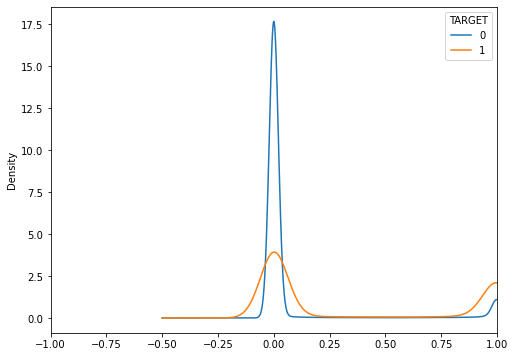

In [188]:
default_wide.plot.density(figsize=(8,6), xlim=(-1,1))

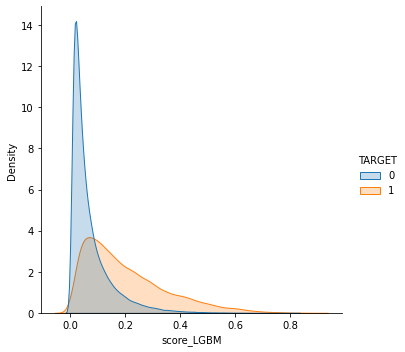

In [33]:
sns.displot(data, x="score_LGBM", hue="TARGET", kind = 'kde', fill = True, common_norm = False)#stat = 'probability', common_norm = False)

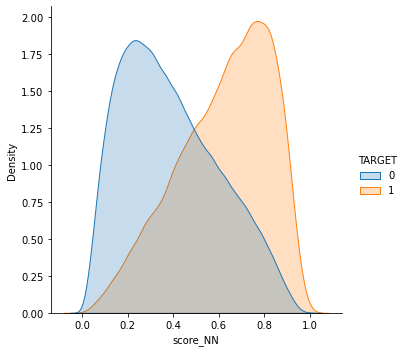

In [34]:
sns.displot(data, x="score_NN", hue="TARGET", kind = 'kde', fill = True, common_norm = False)#stat = 'probability', common_norm = False)

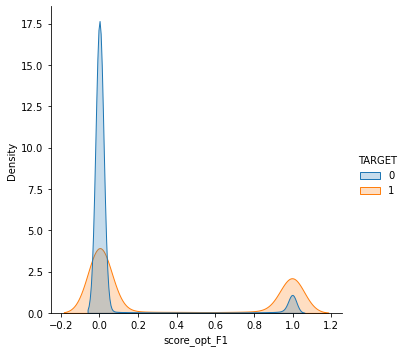

In [207]:
sns.displot(data, x="score_opt_F1", hue="TARGET", kind = 'kde', fill = True, common_norm = False)#stat = 'probability', common_norm = False)

In [35]:
data.head()

,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous,SKEW(previ

In [11]:
data = pd.read_csv("./final_model/scored_final_table.csv")

In [12]:
data_tree = pd.read_csv("arvore_v0_escorada.csv")

In [13]:
data.head()

,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous,SKEW(previ

In [15]:
data_tree = data_tree[['SK_ID_CURR', 'score_tree', 'predicted_tree']]

In [16]:
data_tree.head()

,SK_ID_CURR,score_tree,predicted_tree
0,226605,0.442040,0
1,198289,0.029963,0
2,119805,0.442040,0
3,104932,0.180153,0
4,383641,0.180153,0


In [17]:
data_final = pd.merge(data, data_tree, how = 'left')

In [19]:
data_final.shape

(307511, 169)

In [20]:
data_final.to_csv('./final_model/scored_final_table.csv')